In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model

In [15]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
x_train.shape

(50000, 32, 32, 3)

In [16]:
# number of classes
# set contains only unique elements
K = len(set(y_train))
K

10

In [17]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
# x = Conv2D(32, (3, 3), strides=2, activation="relu")(i)
# x = Conv2D(64, (3, 3), strides=2, activation="relu")(x)
# x = Conv2D(128, (3, 3), strides=2, activation="relu")(x)

x = Conv2D(32, (3, 3), activation="relu", padding="same")(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(K, activation="softmax")(x)

model = Model(i, x)

In [18]:
# Compile the model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

## Data Augmentation

In [19]:
# Fit the model
# If we run this after running previos model.fit(), it will continue training where it left off
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
1562/1562 [==============================] - 45s 29ms/step - loss: 1.4326 - accuracy: 0.5038 - val_loss: 1.0349 - val_accuracy: 0.6258
Epoch 2/50
1562/1562 [==============================] - 44s 28ms/step - loss: 0.9806 - accuracy: 0.6578 - val_loss: 0.8761 - val_accuracy: 0.7053
Epoch 3/50
1562/1562 [==============================] - 45s 29ms/step - loss: 0.8420 - accuracy: 0.7089 - val_loss: 0.8181 - val_accuracy: 0.7306
Epoch 4/50
1562/1562 [==============================] - 46s 30ms/step - loss: 0.7506 - accuracy: 0.7436 - val_loss: 0.7190 - val_accuracy: 0.7570
Epoch 5/50
1562/1562 [==============================] - 46s 29ms/step - loss: 0.6834 - accuracy: 0.7659 - val_loss: 0.7747 - val_accuracy: 0.7448
Epoch 6/50
1562/1562 [==============================] - 45s 29ms/step - loss: 0.6365 - accuracy: 0.7824 - val_loss: 0.6497 - val_accuracy: 0.7891
Epoch 7/50
1562/1562 [==============================] - 45s 29ms/step - loss: 0.5907 - accuracy: 0.7974 - val_loss: 0.5855 -

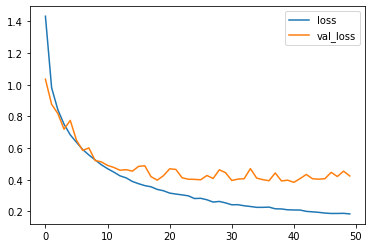

In [20]:
# Loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

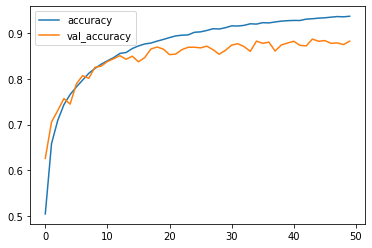

In [21]:
# Accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [22]:
# Evaluate the model
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 2s 6ms/step - loss: 0.4237 - accuracy: 0.8830
[0.42366737127304077, 0.8830000162124634]


Confusion matrix without normalization
[[927   5  24   4   8   0   4   5  19   4]
 [  9 954   0   0   1   0   3   0   3  30]
 [ 35   3 864  10  42  19  20   3   2   2]
 [ 14   4  58 709  59  79  51  17   5   4]
 [  5   1  38  11 914   5  15  11   0   0]
 [  5   0  42  80  42 784  22  24   0   1]
 [  5   1  30   9   7   1 942   3   1   1]
 [  9   1  17  14  40  13   2 901   1   2]
 [ 39  14  11   2   4   1   1   0 922   6]
 [ 15  46   4   1   2   1   5   2  11 913]]


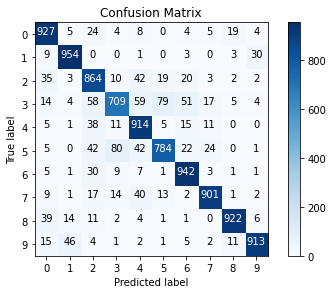

In [23]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix without normalization")
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()
    
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [24]:
# Label mapping
labels = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

Text(0.5, 1.0, 'True label: Airplane Predicted: Cat')

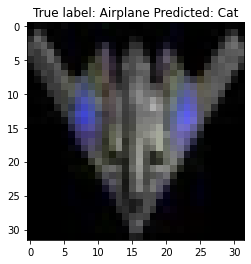

In [25]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(32, 32, 3))
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))